In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
import os

In [3]:
IMG_WIDTH = 512
IMG_HEIGHT = 256
IMG_CHANNELS = 3

input

In [4]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

contructing

In [5]:
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

In [6]:
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

In [7]:
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

In [8]:
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

In [9]:
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

expanding

In [10]:
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

In [11]:
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

In [12]:
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

In [13]:
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

output

In [14]:
outputs = tf.keras.layers.Conv2D(1, (1,1), activation='sigmoid')(c9)

In [15]:

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 256, 512, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 512, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [16]:
TRAIN_FOLDER = 'drive/MyDrive/train/'
TRAIN_MASK_FOLDER = 'drive/MyDrive/masks'
TRAIN_FILES = next(os.walk(TRAIN_FOLDER))[2]

In [18]:
X_train = np.zeros((len(TRAIN_FILES),IMG_HEIGHT,IMG_WIDTH,3),dtype=np.uint8)
Y_train = np.zeros((len(TRAIN_FILES),IMG_HEIGHT,IMG_WIDTH,1),dtype=bool)
for i,file in enumerate(TRAIN_FILES):
    image = cv2.imread(os.path.join(TRAIN_FOLDER,file),1)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    X_train[i] = cv2.resize(image,(IMG_WIDTH,IMG_HEIGHT))
    mask = cv2.imread(os.path.join(TRAIN_MASK_FOLDER,file.split(".")[0]+"_mask.png"),0)
    mask = cv2.resize(mask,(IMG_WIDTH,IMG_HEIGHT))
    temp = mask.flatten()
    temp = (temp>0)*255
    mask = temp.reshape((mask.shape))
    mask = mask.reshape((IMG_HEIGHT,IMG_WIDTH,1))
    Y_train[i] = mask



In [19]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_segmentation.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25
23/23 [==============================] - 34s 513ms/step - loss: 0.3593 - accuracy: 0.7683 - val_loss: 0.1794 - val_accuracy: 0.9872
Epoch 2/25
23/23 [==============================] - 8s 359ms/step - loss: 0.0564 - accuracy: 0.9896 - val_loss: 0.0174 - val_accuracy: 0.9939
Epoch 3/25
23/23 [==============================] - 8s 361ms/step - loss: 0.0273 - accuracy: 0.9907 - val_loss: 0.0143 - val_accuracy: 0.9957
Epoch 4/25
23/23 [==============================] - 8s 367ms/step - loss: 0.0206 - accuracy: 0.9928 - val_loss: 0.0108 - val_accuracy: 0.9961
Epoch 5/25
23/23 [==============================] - 8s 359ms/step - loss: 0.0144 - accuracy: 0.9948 - val_loss: 0.0133 - val_accuracy: 0.9949
Epoch 6/25
23/23 [==============================] - 8s 361ms/step - loss: 0.0164 - accuracy: 0.9942 - val_loss: 0.0096 - val_accuracy: 0.9968
Epoch 7/25
23/23 [==============================] - 8s 361ms/step - loss: 0.0127 - accuracy: 0.9954 - val_loss: 0.0074 - val_accuracy: 0.9974
Epoch

1/1 [==============================] - 1s 901ms/step


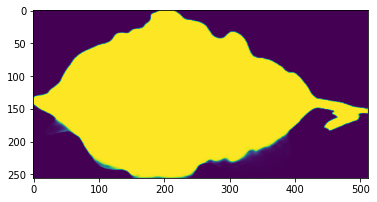

In [21]:
img = cv2.imread('1338.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(512,256))
out = model.predict(np.array([img]))
plt.imshow(out[0])

In [20]:
model.save('drive/MyDrive/imagesegmentationmodel.hdf5')